### ``Benchmarks results``

#### ``Size of compressed files``

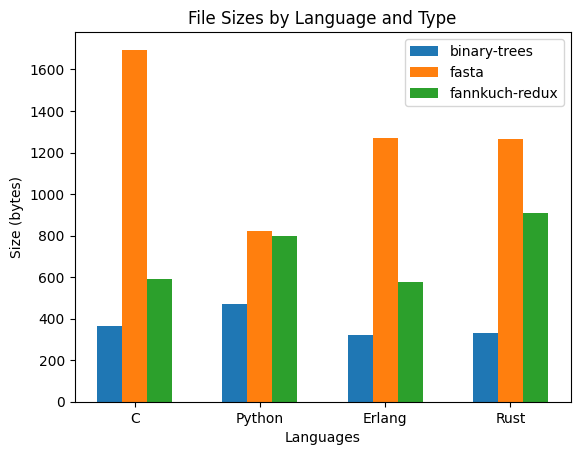

In [9]:
import matplotlib.pyplot as plt

data = {
    'C': {'binary-trees': 363, 'fasta': 1695, 'fannkuch-redux': 591},
    'Python': {'binary-trees': 472, 'fasta': 823, 'fannkuch-redux': 797},
    'Erlang': {'binary-trees': 320, 'fasta': 1268, 'fannkuch-redux': 576},
    'Rust': {'binary-trees': 332, 'fasta': 1265, 'fannkuch-redux': 907}
}

# Extracting data
languages = list(data.keys())
file_types = list(data['C'].keys())
sizes = {file_type: [data[language][file_type] for language in languages] for file_type in file_types}

# Plotting
bar_width = 0.2
index = range(len(languages))

for i, (file_type, size) in enumerate(sizes.items()):
    plt.bar([x + i * bar_width for x in index], size, bar_width, label=file_type)

plt.xlabel('Languages')
plt.ylabel('Size (bytes)')
plt.title('File Sizes by Language and Type')
plt.xticks([x + bar_width for x in index], languages)
plt.legend()
plt.show()


#### ``Time, CPU time and memory usage``

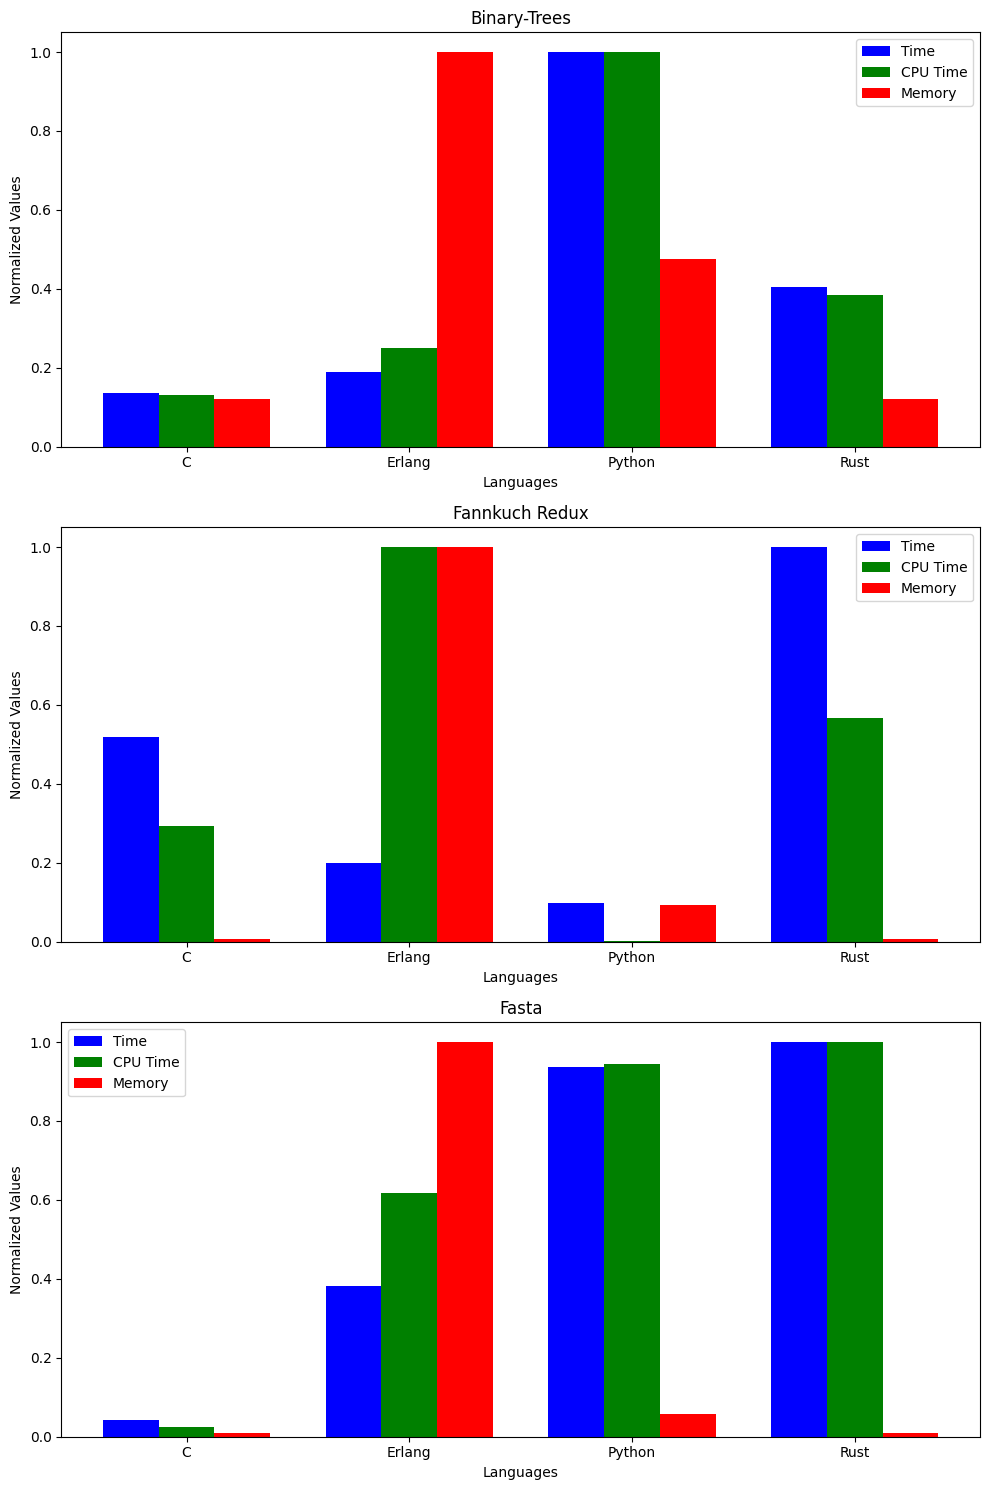

In [10]:
import matplotlib.pyplot as plt

data = {
    'Binary-Trees': {
        'C': {'Time': 5.00, 'CPU Time': 4.82, 'Memory': 132044.0},
        'Erlang': {'Time': 7.01, 'CPU Time': 9.22, 'Memory': 1089692.0},
        'Python': {'Time': 37.02, 'CPU Time': 36.86, 'Memory': 518392.0},
        'Rust': {'Time': 15.01, 'CPU Time': 14.15, 'Memory': 132804.0}
    },
    'Fannkuch Redux': {
        'C': {'Time': 73.03, 'CPU Time': 72.49, 'Memory': 940.0},
        'Erlang': {'Time': 28.01, 'CPU Time': 248.05, 'Memory': 150060.0},
        'Python': {'Time': 14.00, 'CPU Time': 0.33, 'Memory': 13912.0},
        'Rust': {'Time': 141.06, 'CPU Time': 140.66, 'Memory': 920.0}
    },
    'Fasta': {
        'C': {'Time': 2.00, 'CPU Time': 1.13, 'Memory': 1312.0},
        'Erlang': {'Time': 18.01, 'CPU Time': 28.67, 'Memory': 143724.0},
        'Python': {'Time': 44.02, 'CPU Time': 43.94, 'Memory': 8440.0},
        'Rust': {'Time': 47.02, 'CPU Time': 46.52, 'Memory': 1212.0}
    }
}

# Extracting data
file_types = list(data.keys())
languages = list(data['Binary-Trees'].keys())
times = {file_type: {'Time': [data[file_type][language]['Time'] for language in languages]} for file_type in file_types}
cpu_times = {file_type: {'CPU Time': [data[file_type][language]['CPU Time'] for language in languages]} for file_type in file_types}
memories = {file_type: {'Memory': [data[file_type][language]['Memory'] for language in languages]} for file_type in file_types}

# Normalize data
for file_type in file_types:
    max_time = max(times[file_type]['Time'])
    max_cpu_time = max(cpu_times[file_type]['CPU Time'])
    max_memory = max(memories[file_type]['Memory'])
    for language in languages:
        times[file_type]['Time'][languages.index(language)] /= max_time
        cpu_times[file_type]['CPU Time'][languages.index(language)] /= max_cpu_time
        memories[file_type]['Memory'][languages.index(language)] /= max_memory

# Plotting
bar_width = 0.25
index = range(len(languages))

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i, (file_type, time_data) in enumerate(times.items()):
    ax[i].bar([x - bar_width for x in index], time_data['Time'], bar_width, label='Time', color='b')
    ax[i].bar(index, cpu_times[file_type]['CPU Time'], bar_width, label='CPU Time', color='g')
    ax[i].bar([x + bar_width for x in index], memories[file_type]['Memory'], bar_width, label='Memory', color='r')

    ax[i].set_xlabel('Languages')
    ax[i].set_ylabel('Normalized Values')
    ax[i].set_title(file_type)
    ax[i].set_xticks(index)
    ax[i].set_xticklabels(languages)
    ax[i].legend()

plt.tight_layout()
plt.show()

#### ``Options compilation for C``

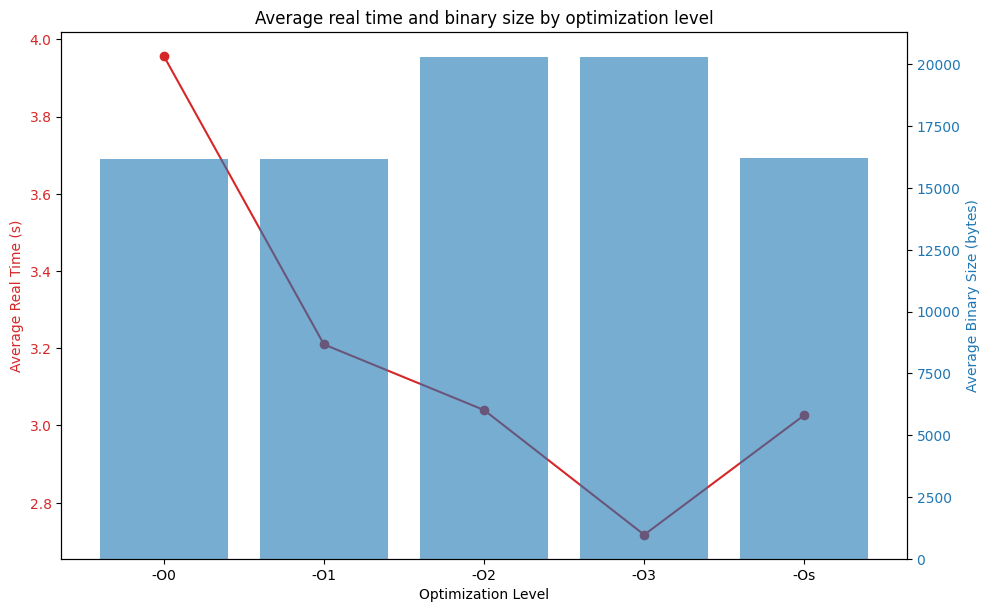

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    '../results/binary-trees_compilation_stats-c.csv',
    '../results/fannkuch-redux_compilation_stats-c.csv',
]

for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    data = data[data['Real Time(s)'] != ' Compilation Failed']

    data['Real Time(s)'] = pd.to_numeric(data['Real Time(s)'], errors='coerce')
    data['User Time(s)'] = pd.to_numeric(data['User Time(s)'], errors='coerce')
    data['System Time(s)'] = pd.to_numeric(data['System Time(s)'], errors='coerce')
    data['Binary Size(bytes)'] = pd.to_numeric(data['Binary Size(bytes)'], errors='coerce')

    averages = data.groupby('Optimization').mean().reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Optimization Level')
    ax1.set_ylabel('Average Real Time (s)', color=color)
    ax1.plot(averages['Optimization'], averages['Real Time(s)'], color=color, marker='o', label='Average Real Time')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Average Binary Size (bytes)', color=color)
    ax2.bar(averages['Optimization'], averages['Binary Size(bytes)'], color=color, alpha=0.6, label='Average Binary Size')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Average Real Time and Binary Size by Optimization Level ({csv_file})')
    plt.show()